In [1]:
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt
import severity_score as ses


/Users/frido/anaconda3/envs/topic02_team02/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### In this document the same operations as in Domain_slicing are done. In this case the Amino acids, that cannot be reached with single mutations of the DNA are removed before.

Starting out with Generation of the new DF with only the single mutations

In [2]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
gia_null_eto =pd.read_csv(fpath)
dc.aufteilung_mut_pos(gia_null_eto)

dna_sequence = "ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCACCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGATGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAGGGCTCACTCCAGCCACCTGAAGTCCAAAAAGGGTCAGTCTACCTCCCGCCATAAAAAACTCATGTTCAAGACAGAAGGGCCTGACTCAGAC"
rna_sequence = dna_sequence.replace("T", "U")

p53_codons = [rna_sequence[i:i+3] for i in range(0, len(rna_sequence), 3)]

p53_codons[71] = "CGC"

mutated_p53 = ses.generate_codon_variations(p53_codons)

translated_p53 = ses.translate_codons_df(mutated_p53)

cleaned_p53 = ses.clean_variation_matrix(translated_p53)

df = gia_null_eto[gia_null_eto.apply(lambda row: (cleaned_p53.loc[row['position_mut']-1, 'Original'] == row['AS_old']) and (row['AS_new'] in cleaned_p53.loc[row['position_mut']-1, ['Variation 1', 'Variation 2', 'Variation 3', 'Variation 4', 'Variation 5', 'Variation 6', 'Variation 7', 'Variation 8', 'Variation 9']].values), axis=1)]

df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position_mut,AS_old,AS_new
4,M1V,VEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.669727,0,1,M,V
5,M1T,TEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.380537,1,1,M,T
6,M1R,REEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.470598,0,1,M,R
10,M1L,LEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-2.032227,0,1,M,L
16,M1I,IEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.370065,0,1,M,I
...,...,...,...,...,...,...,...
7456,D393H,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,1.077643,1,393,D,H
7460,D393G,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.889272,1,393,D,G
7462,D393E,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.701935,1,393,D,E
7464,D393A,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,1.132786,1,393,D,A


In [3]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [4]:
t1_mean = t1_domain.mean().rename('mean')
t1_mean.to_csv('./t1_mean_smu.csv')

t2_mean = t2_domain.mean().rename('mean')
t2_mean.to_csv('./t2_mean_smu.csv')

pr_mean = pr_domain.mean().rename('mean')
pr_mean.to_csv('./pr_mean_smu.csv')

dna_mean = dna_domain.mean().rename('mean')
dna_mean.to_csv('./dna_mean_smu.csv')

tetra_mean = tetra_domain.mean().rename('mean')
tetra_mean.to_csv('./tetra_mean_smu.csv')

reg_mean = reg_domain.mean().rename('mean')
reg_mean.to_csv('./reg_mean_smu.csv')


## Distribution and Heatmaps
### Transactivation Domain 1

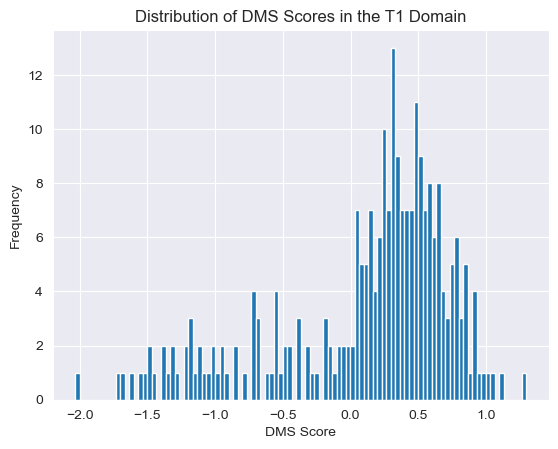

0.10486059227641084
0.3064392264109669


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

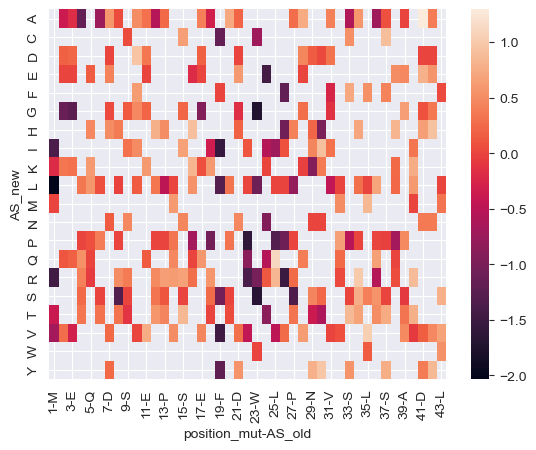

In [5]:

dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

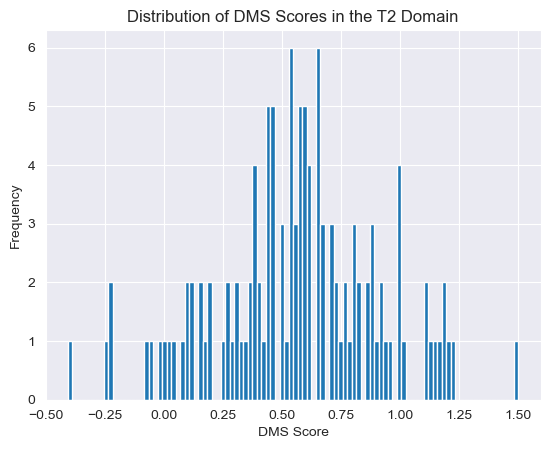

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

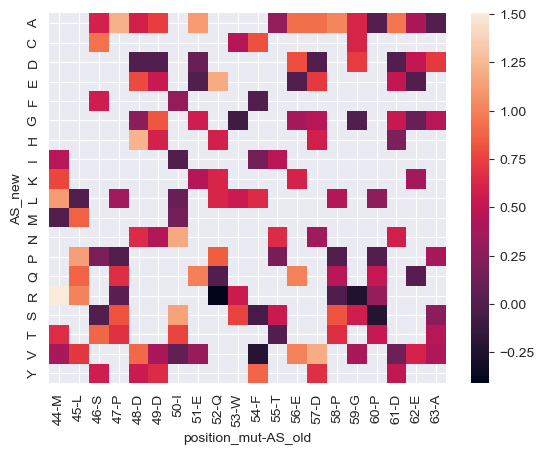

In [6]:

dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()

sns.heatmap(t2_domain)

### Proline-rich Region

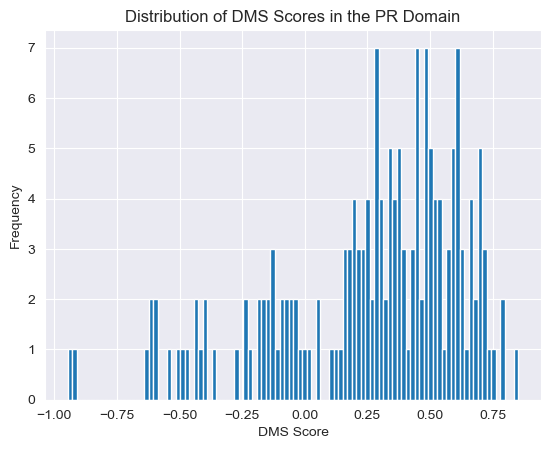

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

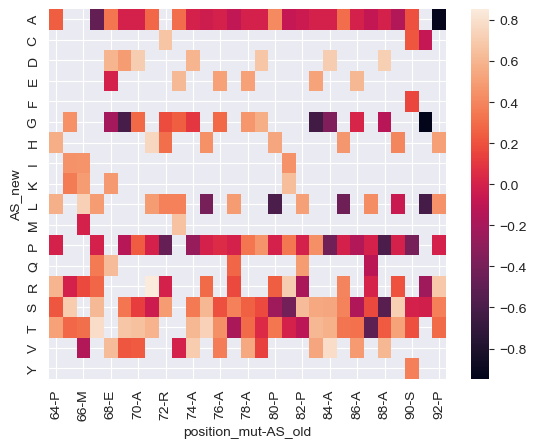

In [7]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()

sns.heatmap(pr_domain)

### DNA Binding Domain

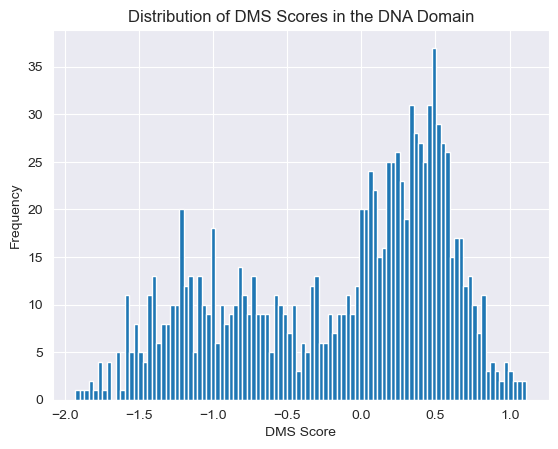

-0.1583281116481984
0.070711550184213


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

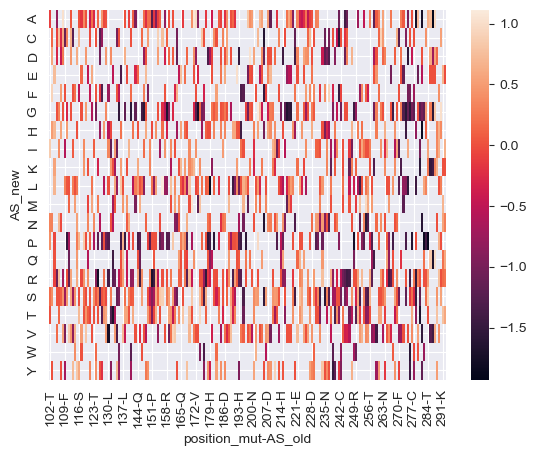

In [8]:

dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())


sns.heatmap(dna_domain)

### Tetramerization Domain

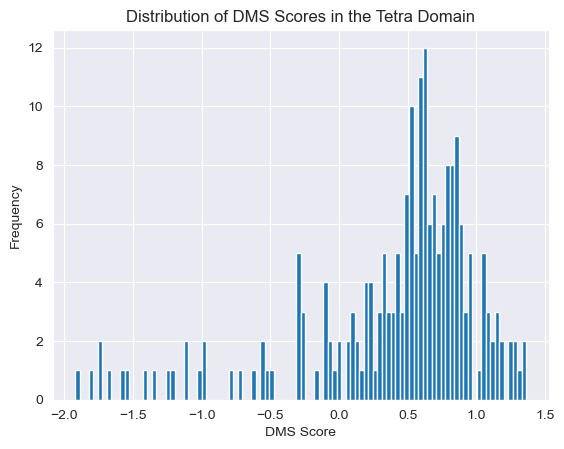

0.39836856048732644
0.5788350221420611


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

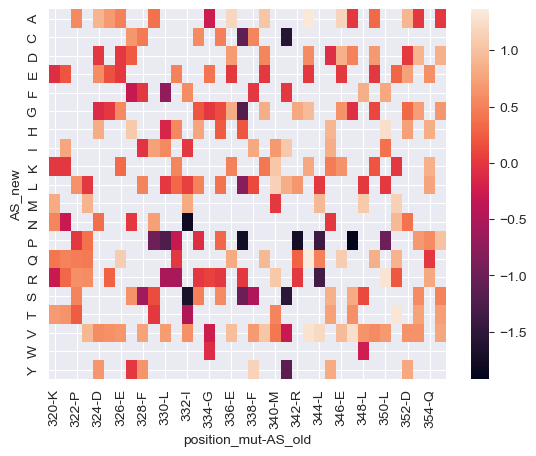

In [9]:

dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

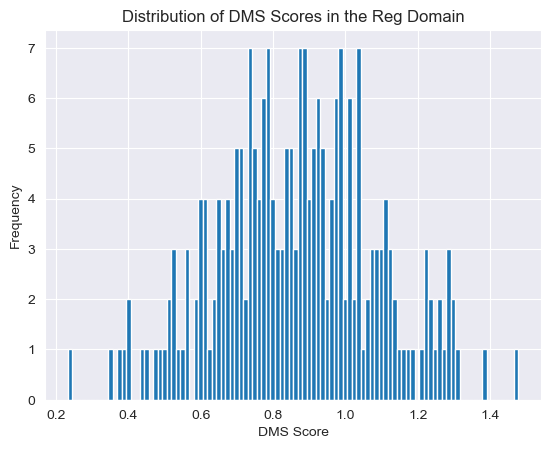

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

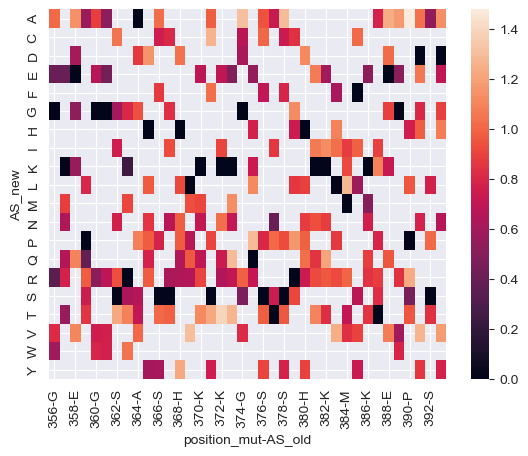

In [10]:

dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()

sns.heatmap(reg_domain)

## Standard deviation


In [11]:

t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

,t1_std,t2_std,pr_std,dna_std,tetra_std,reg_std
0,0.420278,0.143658,0.15504,0.422516,0.355073,0.092565


## Mean value matrix

<Axes: xlabel='AS_new', ylabel='AS_old'>

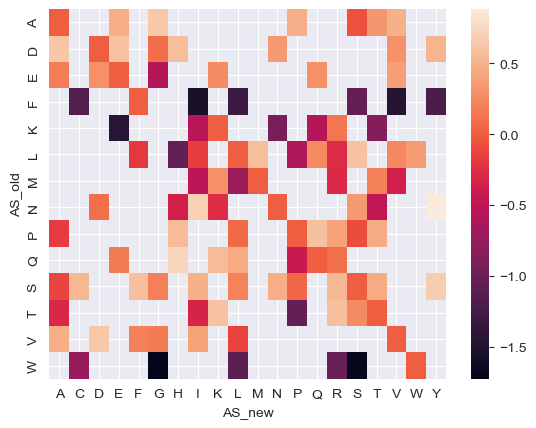

In [12]:
import seaborn as sns
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

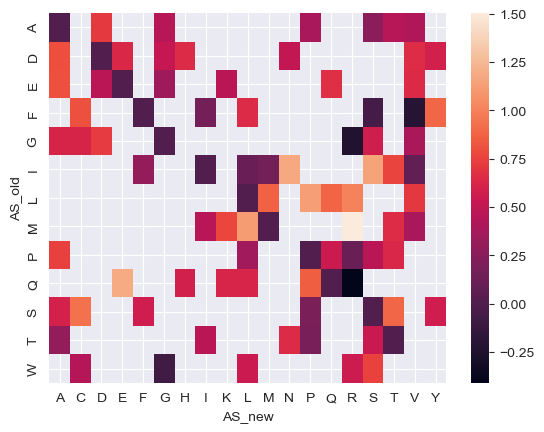

In [13]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

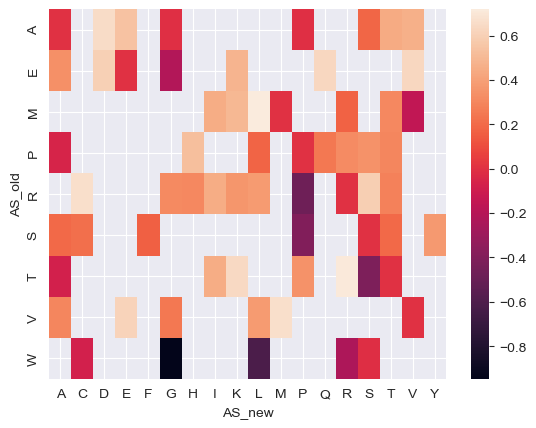

In [14]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

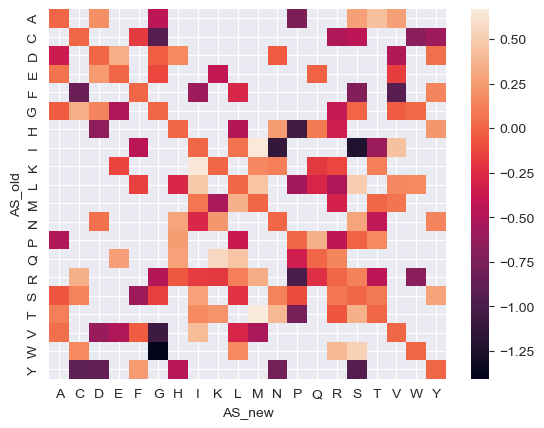

In [15]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

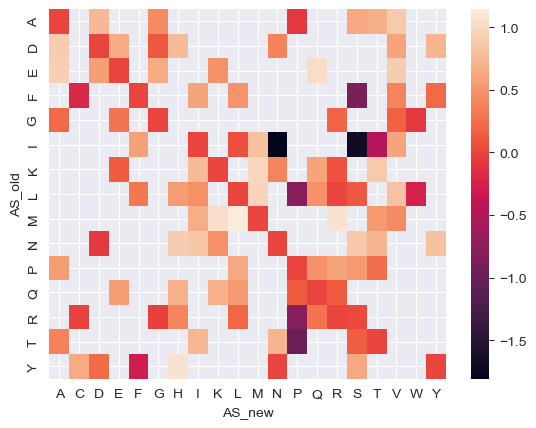

In [16]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

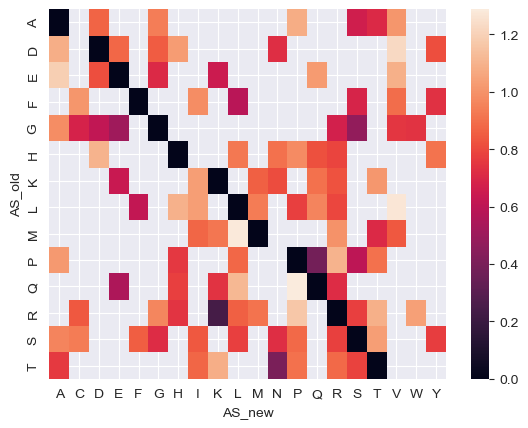

In [17]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))

## Shapiro Wilk test

In [18]:

print('T1 Domain')
print(doc.test_normality(t1_list['DMS_score']))

print('T2 Domain')
print(doc.test_normality(t2_list['DMS_score']))

print('PR Domain')
print(doc.test_normality(pr_list['DMS_score']))

print('DNA Domain')
print(doc.test_normality(dna_list['DMS_score']))

print('Tetra Domain')
print(doc.test_normality(tetra_list['DMS_score']))

print('Reg Domain')
print(doc.test_normality(reg_list['DMS_score']))

T1 Domain
{'statistic': 0.8876031637191772, 'p-value': 9.422538704145778e-13, 'is_normal': False}
T2 Domain
{'statistic': 0.9918553829193115, 'p-value': 0.6967537999153137, 'is_normal': True}
PR Domain
{'statistic': 0.9207308292388916, 'p-value': 4.952158505489024e-08, 'is_normal': False}
DNA Domain
{'statistic': 0.9274613857269287, 'p-value': 6.24723689522507e-23, 'is_normal': False}
Tetra Domain
{'statistic': 0.8454703092575073, 'p-value': 1.014640845301007e-13, 'is_normal': False}
Reg Domain
{'statistic': 0.997754693031311, 'p-value': 0.989086925983429, 'is_normal': True}
